**3.(a)**

$$p(y;\eta)=\frac{1}{y!}\text{exp}(y\text{log}\lambda-\lambda)$$

Therefore, the Poisson is an exponential family distribution with $\eta=\text{log}\lambda, T(y)=y,a(\eta)=\lambda=e^{\eta}$ and $b(y)=\frac{1}{y!}$

**(b)**

$\eta=\text{log}\lambda$, $\eta$ is called the canonical parameter. so $\lambda=e^{\eta}$, the canonical response function is $g(\eta)=e^{\eta}$

**(c)**

We have:

Note: Use the results from previous parts and the standard GLM assumption that $\eta=\theta^T x$

$$\begin{equation*} 
    \begin{split}
        &\frac{\partial}{\partial \theta_j}\text{log}p(y^{(i)}|x^{(i)};\theta) \\
        &=\frac{\partial}{\partial \theta_j}\text{log}\big(\frac{1}{y!}\text{exp}(\eta y-e^{\eta})\big)\\
        &=\frac{\partial}{\partial \theta_j}\text{log}\big(\frac{1}{y!}\text{exp}(y\theta^T x^{(i)}-e^{\theta^T x^{(i)}})\big)\\
        &=\frac{\partial}{\partial \theta_j}\big(\text{log}\frac{1}{y!}+y\theta^T x^{(i)}-e^{\theta^T x^{(i)}}\big)\\
        &=(y-e^{\theta^T x^{(i)}})x_j
    \end{split}
\end{equation*}$$

So, the SGA update rule for this GLM model is :

$$\theta_j=\theta_j+\alpha(y-e^{\theta^T x^{(i)}})x_j$$ for all $j$.

**(d)**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import util
import sys
sys.path.append('../linearclass')

from linear_model import LinearModel

x_train, y_train = util.load_dataset('train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('valid.csv', add_intercept=True)

In [4]:
# Implement Poisson Regression
from poisson import PoissonRegression

clf = PoissonRegression(step_size=2e-7)
clf.fit(x_train, y_train)

In [7]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'go', label='label')
    plt.plot(y_pred, 'rx', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

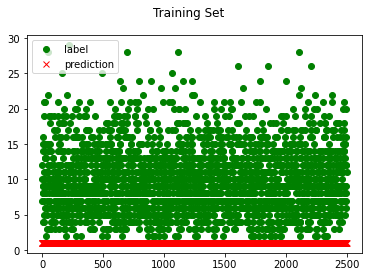

In [8]:
y_train_pred = clf.predict(x_train)
plot(y_train, y_train_pred, 'Training Set')

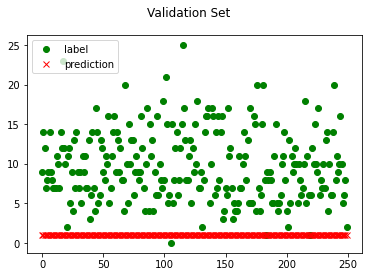

In [9]:
y_valid_pred = clf.predict(x_valid)
plot(y_valid, y_valid_pred, 'Validation Set')

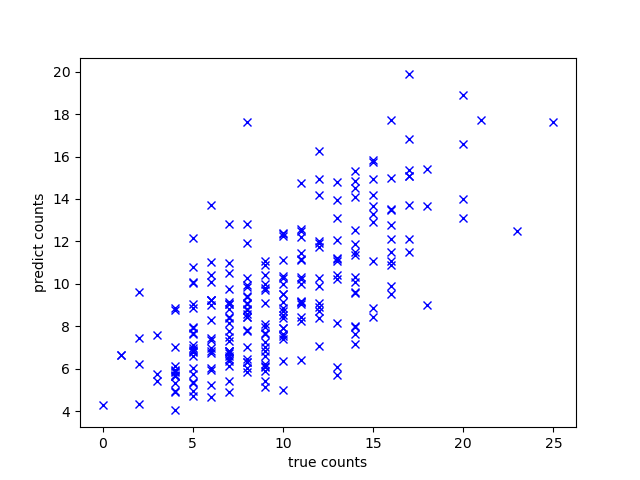